### WRITE A PROGRAM TO GENERATE PIXELS

In [1]:
from PIL import Image

im= Image.new("RGB", (128, 128), "#00FFFF")

#For creating hypnotic pattern 
im.paste((256,256,0),(10,10,118,118))
im.paste((0,256,256),(20,20,108,108))
im.paste((256,256,0),(30,30,98,98))
im.paste((0,256,256),(40,40,88,88))
im.paste((256,256,0),(50,50,78,78))

im.show()


In [2]:
#For creating square inside a 128x128 image
im= Image.new("RGB", (128, 128), "green")
pixels = im.load()

for x in range(10,118):
    #For top line
    y = 10
    pixels[x,y] = (0,0,0)
    
    #For left line
    x1= 10
    pixels[x1,x] = (0,0,0)
    
    #For right line
    x2= 118
    pixels[x2,x] = (0,0,0)
    
    #for bottom line
    y1= 118
    pixels[x,y1] = (0,0,0)
    
    pixels = im.load()
    

#Now display the image
im.show()

###  PYHTON PROGRAM TO GENERATE VERTICES AND EDGES

In [3]:
class Graph(object):

    def __init__(self, graph_dict=None):
        """ Initializes a graph object """
        if graph_dict == None:
            graph_dict = {}
        self.__graph_dict = graph_dict

    def vertices(self):
        """ returns vertices """
        return list(self.__graph_dict.keys())

    def edges(self):
        """ returns edges"""
        return self.__generate_edges()

    def add_vertex(self, vertex):
        """ If the vertex "vertex" is not in self.__graph_dict
            only then added. 
        """
        if vertex not in self.__graph_dict:
            self.__graph_dict[vertex] = []

    def add_edge(self, edge):
        """ Between two vertices can be multiple edges
        """
        edge = set(edge)
        (vertex1, vertex2) = tuple(edge)
        if vertex1 in self.__graph_dict:
            self.__graph_dict[vertex1].append(vertex2)
        else:
            self.__graph_dict[vertex1] = [vertex2]

    def __generate_edges(self):
        edges = []
        for vertex in self.__graph_dict:
            for neighbour in self.__graph_dict[vertex]:
                if {neighbour, vertex} not in edges:
                    edges.append({vertex, neighbour})
        return edges


if __name__ == "__main__":

    g = { "a" : ["d"],
          "b" : ["c"],
          "c" : ["b", "c", "d", "e"],
          "d" : ["a", "c"],
          "e" : ["c"],
          "f" : []
        }

    #Creating object variable
    graph = Graph(g)

    print("Vertices of graph:")
    print(graph.vertices())

    print("Edges of graph:")
    print(graph.edges())

    print("Add vertex 'z' to graph:")
    graph.add_vertex("z")

    print("Vertices of graph:")
    print(graph.vertices())
 
    print("Add an edge 'a-z':")
    graph.add_edge({"a","z"})
    print(graph.edges())

Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f']
Edges of graph:
[{'a', 'd'}, {'c', 'b'}, {'c'}, {'c', 'd'}, {'c', 'e'}]
Add vertex 'z' to graph:
Vertices of graph:
['a', 'b', 'c', 'd', 'e', 'f', 'z']
Add an edge 'a-z':
[{'a', 'd'}, {'a', 'z'}, {'c', 'b'}, {'c'}, {'c', 'd'}, {'c', 'e'}]


### PROGRAM TO REMOVE BACKGROUND PIXELS FROM AN IMAGE

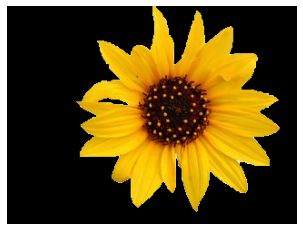

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('sunflower.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

rectangle = (0,0,300,300)

mask = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1,65), np.float64)
fgdModel = np.zeros((1,65), np.float64)

cv2.grabCut(image_rgb, mask, rectangle, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask == 2)| (mask == 0), 0, 1).astype('uint8')

image_rgd_nobg = image_rgb * mask_2[:, :, np.newaxis]

plt.imshow(image_rgd_nobg), plt.axis('off')
plt.show()